Parsed with column specification:
cols(
  Date = col_character(),
  Hour = col_time(format = ""),
  `Consumption (MWh)` = col_number()
)
Parsed with column specification:
cols(
  Date = col_character(),
  Hour = col_time(format = ""),
  `Consumption (MWh)` = col_number()
)



APD MEANS ABSOLUTE PERCENTAGE DEVIATIONS 
MAPD MEANS MEAN ABSOLUTE PERCENTAGE DEVIATIONS


Test period consists of first two weeks (14 days)


Here is the Lag 48 absolute percentage deviations, 24 hours x 14 days

   task1_Lag48_APD.1 task1_Lag48_APD.2 task1_Lag48_APD.3 task1_Lag48_APD.4
1             7.6939              0.78               3.4               7.7
2             7.0248              0.51               4.3               8.3
3             7.2545              0.48               6.1               6.7
4             6.9778              0.62               6.6               6.4
5             6.3196              0.51               6.4               5.9
6             6.5511              1.11               8.3               4.8
7             5.9023              3.21              11.8               1.5
8             5.3044              5.01              20.7               3.1
9             3.4989              8.54              37.5               6.6
10            4.1393              6

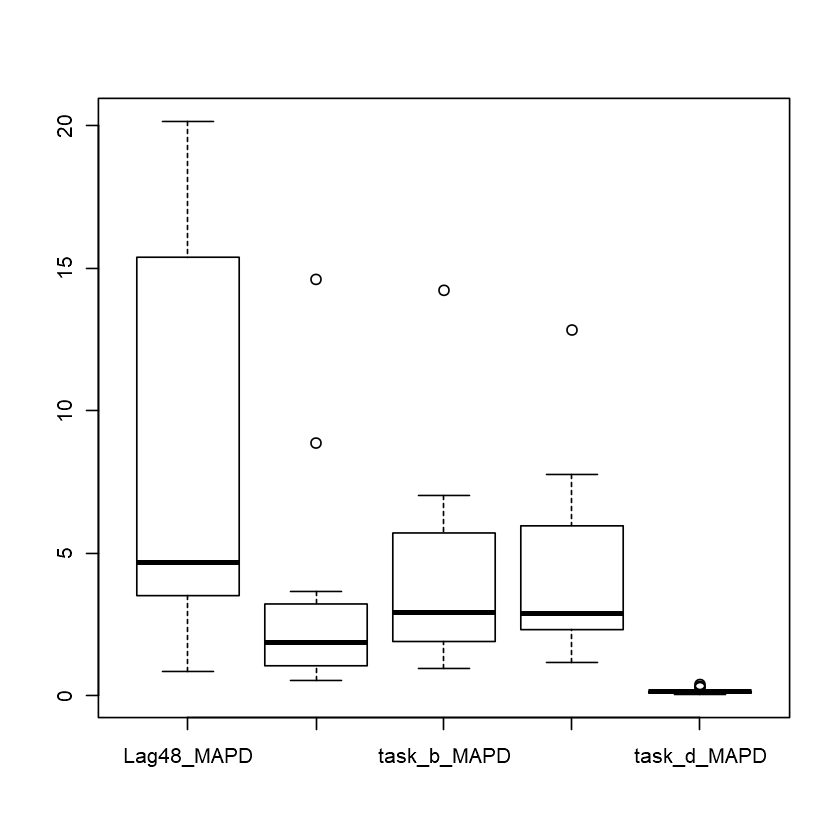

In [16]:
rm(list=ls()) 

library('codetools')
library('Matrix')
library('glmnet')
library('readr')
consumption_train <- read_csv(file="C:/Users/Onur/Desktop/IE 582/HW 3/RealTimeConsumption-01012016-31102019.csv", col_names=TRUE, col_types = NULL ) 
consumption_test <- read_csv(file="C:/Users/Onur/Desktop/IE 582/HW 3/RealTimeConsumption-01112019-19112019.csv", col_names=TRUE, col_types = NULL ) 

# First two weeks of November 2019 are chosen to be test set.

test_length <- 2*7*24
consumption_test <- consumption_test[1:test_length,,]

#####################################################
# Task 1 ############################################
#####################################################

lag48_prediction <- data.frame(Lag48 = matrix(0,test_length,1))
lag168_prediction <- data.frame(Lag168 = matrix(0,test_length,1))

task1_train = consumption_train

for(i in 1:test_length) {
  
  lag48_prediction$Lag48[i] <- task1_train$`Consumption (MWh)`[(length(task1_train$`Consumption (MWh)`)-47)]
  lag168_prediction$Lag168[i] <- task1_train$`Consumption (MWh)`[(length(task1_train$`Consumption (MWh)`)-167)]
  
  task1_train = rbind(task1_train,consumption_test[i,,])  
}

task1_test_and_predictions = cbind(consumption_test,lag48_prediction,lag168_prediction)
task1_errors = data.frame("Lag48.abs.errors" = abs(task1_test_and_predictions$`Consumption (MWh)`- task1_test_and_predictions$Lag48)/task1_test_and_predictions$`Consumption (MWh)` 
                          , "Lag168.abs.errors" = abs(task1_test_and_predictions$`Consumption (MWh)`- task1_test_and_predictions$Lag168)/ task1_test_and_predictions$`Consumption (MWh)` )

# task1_Lag48 =  rowSums(matrix(task1_errors$Lag48.abs.errors,24,14)) * 100 
# task1_Lag168 = rowSums(matrix(task1_errors$Lag168.abs.errors,24,14)) * 100 
# task1_MAPE = data.frame("Lag48" = task1_Lag48, "Lag168" = task1_Lag168) 

cat ( '\nAPD MEANS ABSOLUTE PERCENTAGE DEVIATIONS ' )
task1_Lag48_APD =  data.frame( task1_Lag48_APD = (matrix(task1_errors$Lag48.abs.errors,24,14)) * 100  )
cat ( '\nMAPD MEANS MEAN ABSOLUTE PERCENTAGE DEVIATIONS\n\n'  )
task1_Lag48_MAPD = data.frame (Lag48_MAPD = colSums(task1_Lag48_APD)/24)


task1_Lag168_APD = data.frame( task1_Lag168_APD = (matrix(task1_errors$Lag168.abs.errors,24,14)) * 100  )
task1_Lag168_MAPD = data.frame (Lag168_MAPD = colSums(task1_Lag168_APD)/24)

cat ( '\nTest period consists of first two weeks (14 days)\n\n'  )

cat ( '\nHere is the Lag 48 absolute percentage deviations, 24 hours x 14 days\n\n'  )

print(task1_Lag48_APD, digits = 2)

cat ( '\nHere is the Lag 168 absolute percentage deviations, 24 hours x 14 days\n\n'  )

print(task1_Lag168_APD, digits = 2)

cat ( '\nand Here is the summary statistics(mean) of each day, mean absolute percentage deviations\n\n' )

print(task1_Lag48_MAPD, digits = 2)

cat (' \n\n\n')

print(task1_Lag168_MAPD, digits = 2)

#####################################################
# Task 2 ############################################
#####################################################

task2_train = consumption_train[169:length(consumption_train$Date),,]
task2_train = data.frame(task2_train, "Lag48" = consumption_train$`Consumption (MWh)`[(169-48):(length(consumption_train$Date)-48)]
                         , "Lag168" = consumption_train$`Consumption (MWh)`[(169-168):(length(consumption_train$Date)-168) ] )

linear_model = lm(Consumption..MWh. ~ Lag48 + Lag168, task2_train)
task2_prediction <- matrix(predict(linear_model, task1_test_and_predictions),24,14)

task2_abs_prediction_error = abs(consumption_test$`Consumption (MWh)`- task2_prediction)/consumption_test$`Consumption (MWh)`
task2_APD = data.frame("model b" = ((matrix(task2_abs_prediction_error,24,14))) * 100  )

cat ( '\nHere is the Task2 (Task b) absolute percentage deviations, 24 hours x 14 days\n\n'  )

print(task2_APD, digits = 2)

cat ( '\nand Here is the summary statistics(mean) of each day, mean absolute percentage deviations\n\n' )

task2_MAPD = data.frame (task_b_MAPD = colSums(task2_APD)/24)
print(task2_MAPD, digits = 2)

#####################################################
# Task 3 ############################################
#####################################################

task3_train = task2_train
task3_consumption = matrix(task3_train$Consumption..MWh.,24,length(task3_train$Lag48)/24)
task3_Lag48 = matrix(task3_train$Lag48,24,length(task3_train$Lag48)/24)
task3_Lag168 = matrix(task3_train$Lag168,24,length(task3_train$Lag48)/24)
task3_coefficients = matrix(0,24,3)

for(i in 1:24) {
  
  temp_train = data.frame("Consumption..MWh." = task3_consumption[i,],"Lag48"=task3_Lag48[i,], "Lag168"=task3_Lag168[i,])
  task3_lm = lm(Consumption..MWh. ~ Lag48 + Lag168, temp_train)
  task3_coefficients[i,] = task3_lm$coefficients 
  
}

task3_prediction = matrix(0,336,1)

for(i in 0:13){
  
  task3_prediction[(i*24+1):(i*24+24),1] = task3_coefficients[,1] + task3_coefficients[,2]*task1_test_and_predictions[(i*24+1):(i*24+24),4] + task3_coefficients[,3]*task1_test_and_predictions[(i*24+1):(i*24+24),5]
  
}

task3_abs_prediction_error = abs(consumption_test$`Consumption (MWh)`- task3_prediction)/consumption_test$`Consumption (MWh)`

cat ( '\nHere is the Task 3 (Task c) absolute percentage deviations 24 hours x 14 days\n\n'  )
task3_APD = data.frame("model c" = ((matrix(task3_abs_prediction_error,24,14))) * 100  )

print(task3_APD , digits =2)

cat ( '\nand Here is the summary statistics(mean) of each day, mean absolute percentage deviations\n\n' )

task3_MAPD = data.frame (task_c_MAPD = colSums(task3_APD)/24)
print(task3_MAPD, digits = 2)


#####################################################
# Task 4 ############################################
#####################################################

task4_train = data.frame(t(task3_Lag48),t(task3_Lag168),t(task3_consumption))
task4_test = data.frame(t(matrix(task1_test_and_predictions$Lag48,24,14)),t(matrix(task1_test_and_predictions$Lag168,24,14))) 
task4_predict = matrix(0,14,24)
set.seed(1000)

for(i in 1:24) {
  
  cvfit = cv.glmnet(as.matrix(task4_train[1:NROW(task4_train),1:48]), as.matrix(task4_train[1:NROW(task4_train),48+i]))
  
  for(j in 1:14) {
    
    task4_predict[j,i] = predict(cvfit, as.matrix(task4_test[j,]), s = "lambda.min")
    
  }
}

task4_predict = t(task4_predict)
task4_predict = data.frame("Task4" = as.vector(task4_predict))

task4_abs_prediction_error = abs(consumption_test$`Consumption (MWh)`- task4_predict)/consumption_test$`Consumption (MWh)` 


cat("\n\ncoefficients of the last model show that b0 is the most important coefficient")
cat("\n\nsome of the coefficients shrink to zero")
cat("\n\nAmong the nonzero coefficients, largest coefficient is X24, which is meaningful because this is the model 
      of the last hour of the last day in the test set \n")
print(coef(cvfit,s = "lambda.min"))

cat ( '\nHere is the Task 4 (Task d) absolute percentage deviations, 24 hours x 14 days\n\n'  )

task4_APD = data.frame("model d" = ((matrix(as.matrix(task4_abs_prediction_error),24,14))) * 100 / 14 )
print(task4_APD, digits = 2)


cat ( '\nand Here is the summary statistics(mean) of each day, mean absolute percentage deviations\n\n' )

task4_MAPD = data.frame (task_d_MAPD = colSums(task4_APD)/24)
print(task4_MAPD, digits = 2)


#####################################################
# Task 5 ############################################
#####################################################

all_results = data.frame(task1_Lag48_MAPD,task1_Lag168_MAPD,task2_MAPD,task3_MAPD,task4_MAPD)

boxplot(all_results)

cat("\n\n sometimes boxplot labels does not seem when the code is run in Jupiter notebook ")
cat("\n\n Hence, I will mention each: ")
cat("\n\n First plot is task a-Lag 48, second is task a-Lag 168, third is task b, forth is task c and fifth is task d ")


cat("\n\n box plots show that Lasso is a very effective method for time series")
cat("\n\nAmong all models, lasso gives the best results whereas lag 48 is the worst at the test data")
cat("\n\nBoth linear models give similar performances  ")
cat("\n\nlag 168 is the second best method. it gives good results and it is quite robust ")

cat("\n\n Task a - Lag 48 has both very high variance and high bias")
cat("\n\n Task d - lasso has very low bias and very low variance")

cat("\n\n Task b and Task c lasso has a little smaller bias than lag 48 but they have much smaller variance ")
cat("\n\n Task a - Lag 168 is better than Tak b and Task c in terms of bias and variance")






